### 합성곱 신경망(CNN) 실습

In [1]:
import numpy as np
import pandas as pd

### CIFAR10 dataset 생성

In [2]:
# from tensorflow.keras.datasets import cifar100 # 100도 있다(카테고리 100개)
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("train dataset shape", train_images.shape, train_labels.shape)
print("test dataset shape", test_images.shape, test_labels.shape)

train dataset shape (50000, 32, 32, 3) (50000, 1)
test dataset shape (10000, 32, 32, 3) (10000, 1)


In [3]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


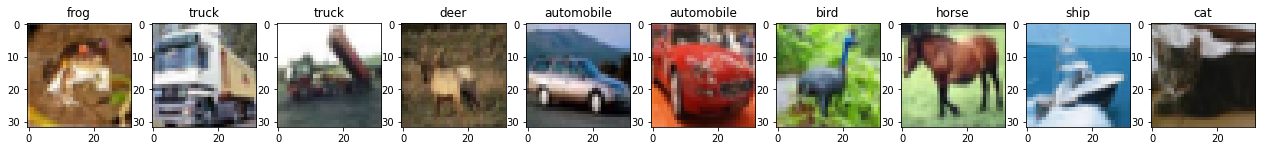

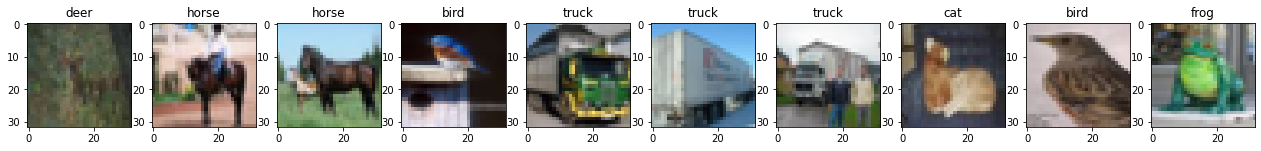

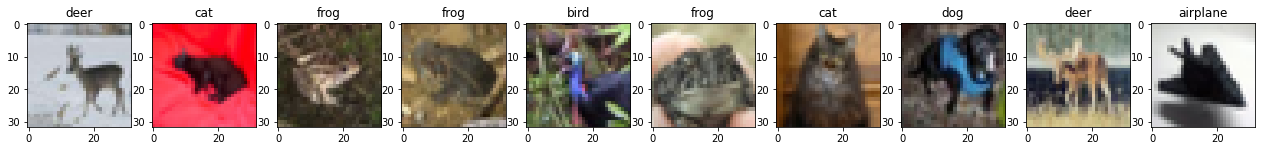

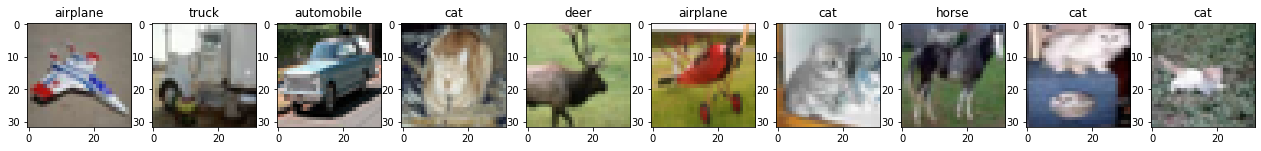

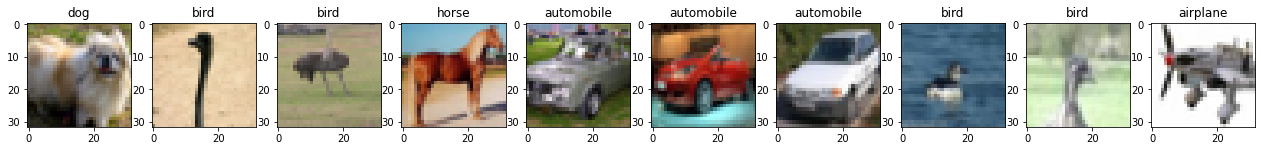

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze() # 2차원의 값을 1차원으로 변환해 준다.
        axs[i].set_title(NAMES[int(label)])
        
step = 10
for i in range(0, step*5, step):
    show_images(train_images[i:i+step], train_labels[i:i+step], ncols=step)

In [5]:
# 데이터 전처리 수행.
# MinMax
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1사이값으로 sacle및 float32형 변환.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [6]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성
- [참고](https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/)


In [7]:
IMAGE_SIZE = 32

In [8]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop

In [9]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# padding='valid'적용하면 별도의 padding을 적용하지 않고 Conv연산 수행
#x = Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu')(input_tensor)
# padding='same'을 넣어주면 Conv연산 시 자동으로 입력 Feture map의 크기를 출력.
# Feature Map에서 유지할 수 있게 padding면적을 계산하여 적용함
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

In [10]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0     

In [11]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )
